In [31]:
import pandas as pd
import os
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

In [12]:
path = '/Users/guangbo_niu/Library/Mobile Documents/com~apple~CloudDocs/Academics/Autumn 2022/DPPP 2/Political_Polarization/tables'
congress_polarity = pd.read_csv(os.path.join(path, 'roll_call.csv'))
public_opinion = pd.read_csv(os.path.join(path, 'public_opinion.csv'))
speech = pd.read_csv(os.path.join(path, 'speech.csv'))

In [13]:
# calculate absolute values of roll_call polarity and get means by date
congress_polarity['roll_call_polarity_abs'] = congress_polarity['polarity'].abs()
roll_call_polarity = pd.DataFrame(congress_polarity.groupby('level_2')['roll_call_polarity_abs'].mean())
roll_call_polarity = roll_call_polarity.reset_index()

# merge roll call and speech data for regression
speech['speech_polarity']=speech['Polarity']
roll_call_plus_speech = pd.merge(roll_call_polarity, speech.loc[:, ['Time', 'speech_polarity']], left_on='level_2', right_on='Time')

In [14]:
roll_call_plus_speech_reg = smf.ols('roll_call_polarity_abs ~ speech_polarity', data=roll_call_plus_speech).fit()
print(roll_call_plus_speech_reg.summary())

                              OLS Regression Results                              
Dep. Variable:     roll_call_polarity_abs   R-squared:                       0.083
Model:                                OLS   Adj. R-squared:                  0.081
Method:                     Least Squares   F-statistic:                     41.71
Date:                    Wed, 07 Dec 2022   Prob (F-statistic):           2.68e-10
Time:                            17:58:31   Log-Likelihood:                -117.47
No. Observations:                     465   AIC:                             238.9
Df Residuals:                         463   BIC:                             247.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [44]:
congress_polarity['party'] = np.sign(congress_polarity['polarity'])
congress_polarity['level_2'] = pd.to_datetime(congress_polarity['level_2'])
congress_polarity = congress_polarity.loc[congress_polarity['level_2']>='2015-01-01']

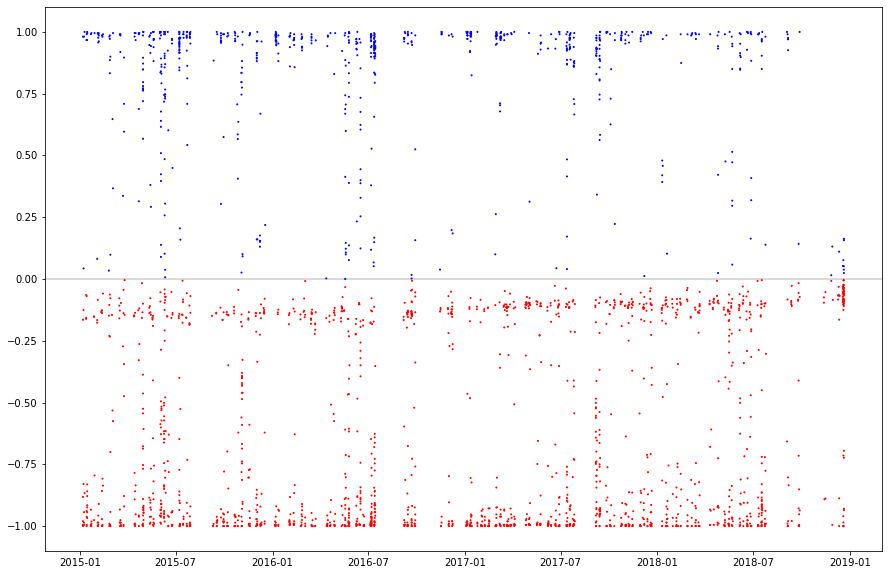

In [59]:
fig, ax = plt.subplots(figsize = (15, 10))
cmap = colors.ListedColormap(['red', 'blue'])
ax.scatter('level_2', 'polarity', data=congress_polarity.loc[congress_polarity['party']==1], s=1, c='party', cmap=cmap)
#plt.xticks(np.arange())
plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth=0.3)
plt.show()